<a href="https://colab.research.google.com/github/omerhac/cifar-100/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-100 EDA notebook


In [11]:
# imports 
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from collections import defaultdict

## Examine dataset size and shape


In [44]:
# load dataset
cifar_train, labels = tfds.load('cifar100', split='train', as_supervised=True, data_dir='data', with_info=True)
cifar_test = tfds.load('cifar100', split='test', as_supervised=True, data_dir='data')

# get lables
labels = labels.features['label']

def get_label_name(label):
    """Return an int label string name"""
    return labels.int2str(label)

In [31]:
# examine size and class distirbution
# count dataclasses
cifar_train_np = cifar_train.as_numpy_iterator()
cifar_test_np = cifar_test.as_numpy_iterator()
train_counter = defaultdict(lambda: 0)
test_counter = defaultdict(lambda: 0)

for image, label in cifar_train_np:
  train_counter[label] += 1

for image, label in cifar_test_np:
  test_counter[label] += 1

train_counts, train_labels = list(train_counter.values()), list(train_counter.keys())
test_counts, test_labels = list(test_counter.values()), list(test_counter.keys())

Train dataset size is: 50000


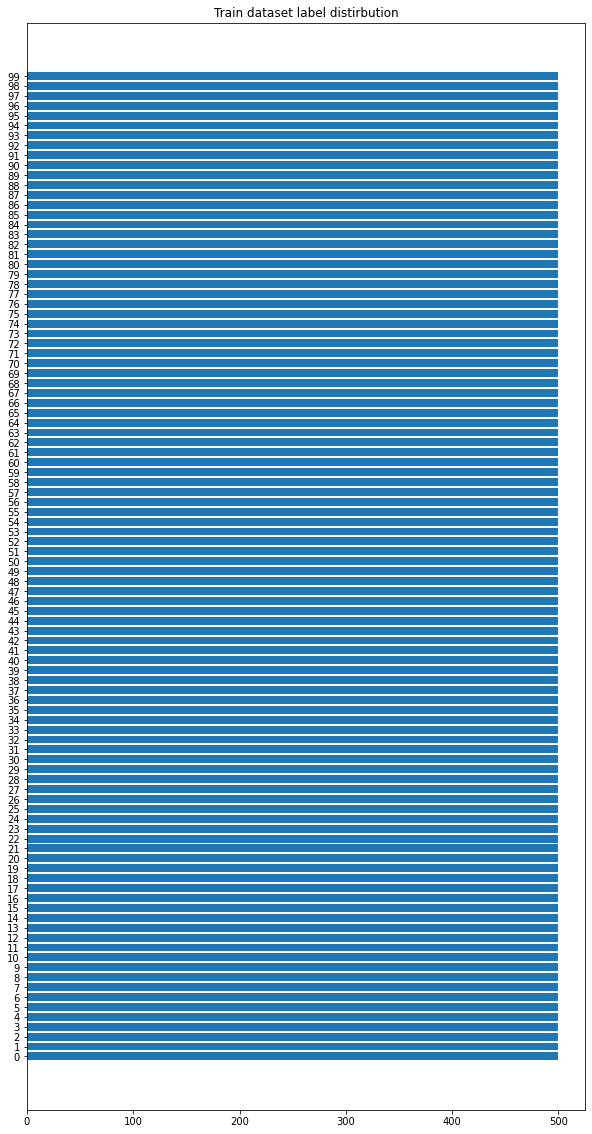

In [33]:
# train dataset
print(f'Train dataset size is: {sum(train_counts)}')

plt.figure(figsize=(10,20))
plt.barh(train_labels, train_counts)
plt.yticks(ticks=train_labels)
plt.title('Train dataset label distirbution')
plt.show()

Test dataset size is: 10000


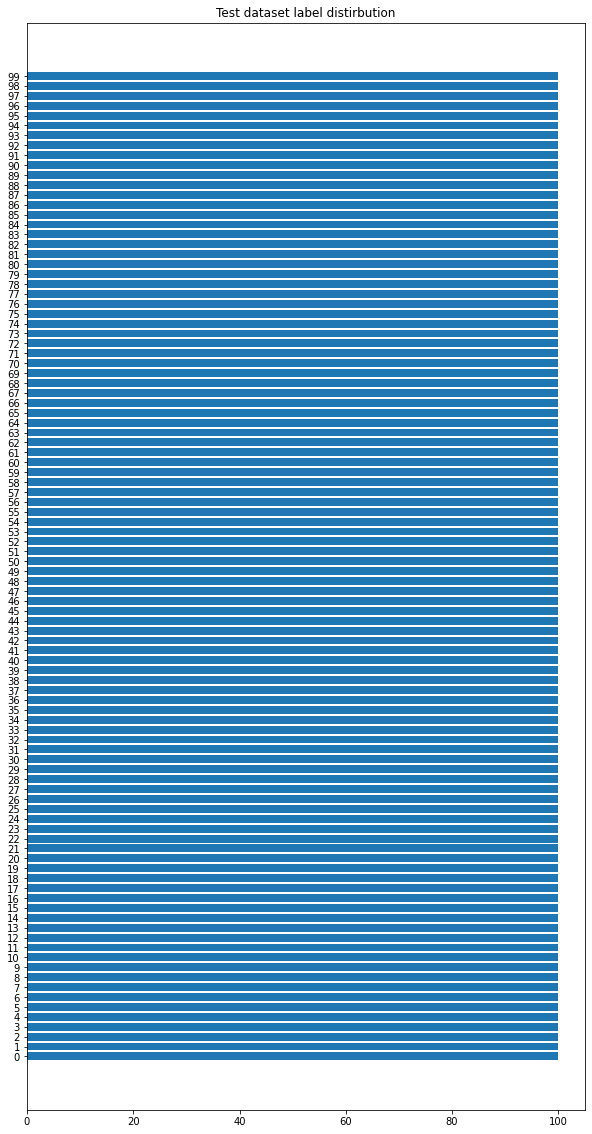

In [34]:
# test dataset
print(f'Test dataset size is: {sum(test_counts)}')

plt.figure(figsize=(10,20))
plt.barh(test_labels, test_counts)
plt.yticks(ticks=test_labels)
plt.title('Test dataset label distirbution')
plt.show()

As we can see, train dataset has 500 pics per dataclass and test dataset has 100 pics per dataclass.

In [50]:
# check shapes
for image, label in cifar_train:
  if image.numpy().shape != (32, 32, 3):
    print(f'Image with shape {image.numpy().shape} found in train dataset')
for image, label in cifar_test:
  if image.numpy().shape != (32, 32, 3):
    print(f'Image with shape {image.numpy().shape} found in test dataset')
  
print('All images are with shape [32, 32, 3] !')

All images are with shape [32, 32, 3] !


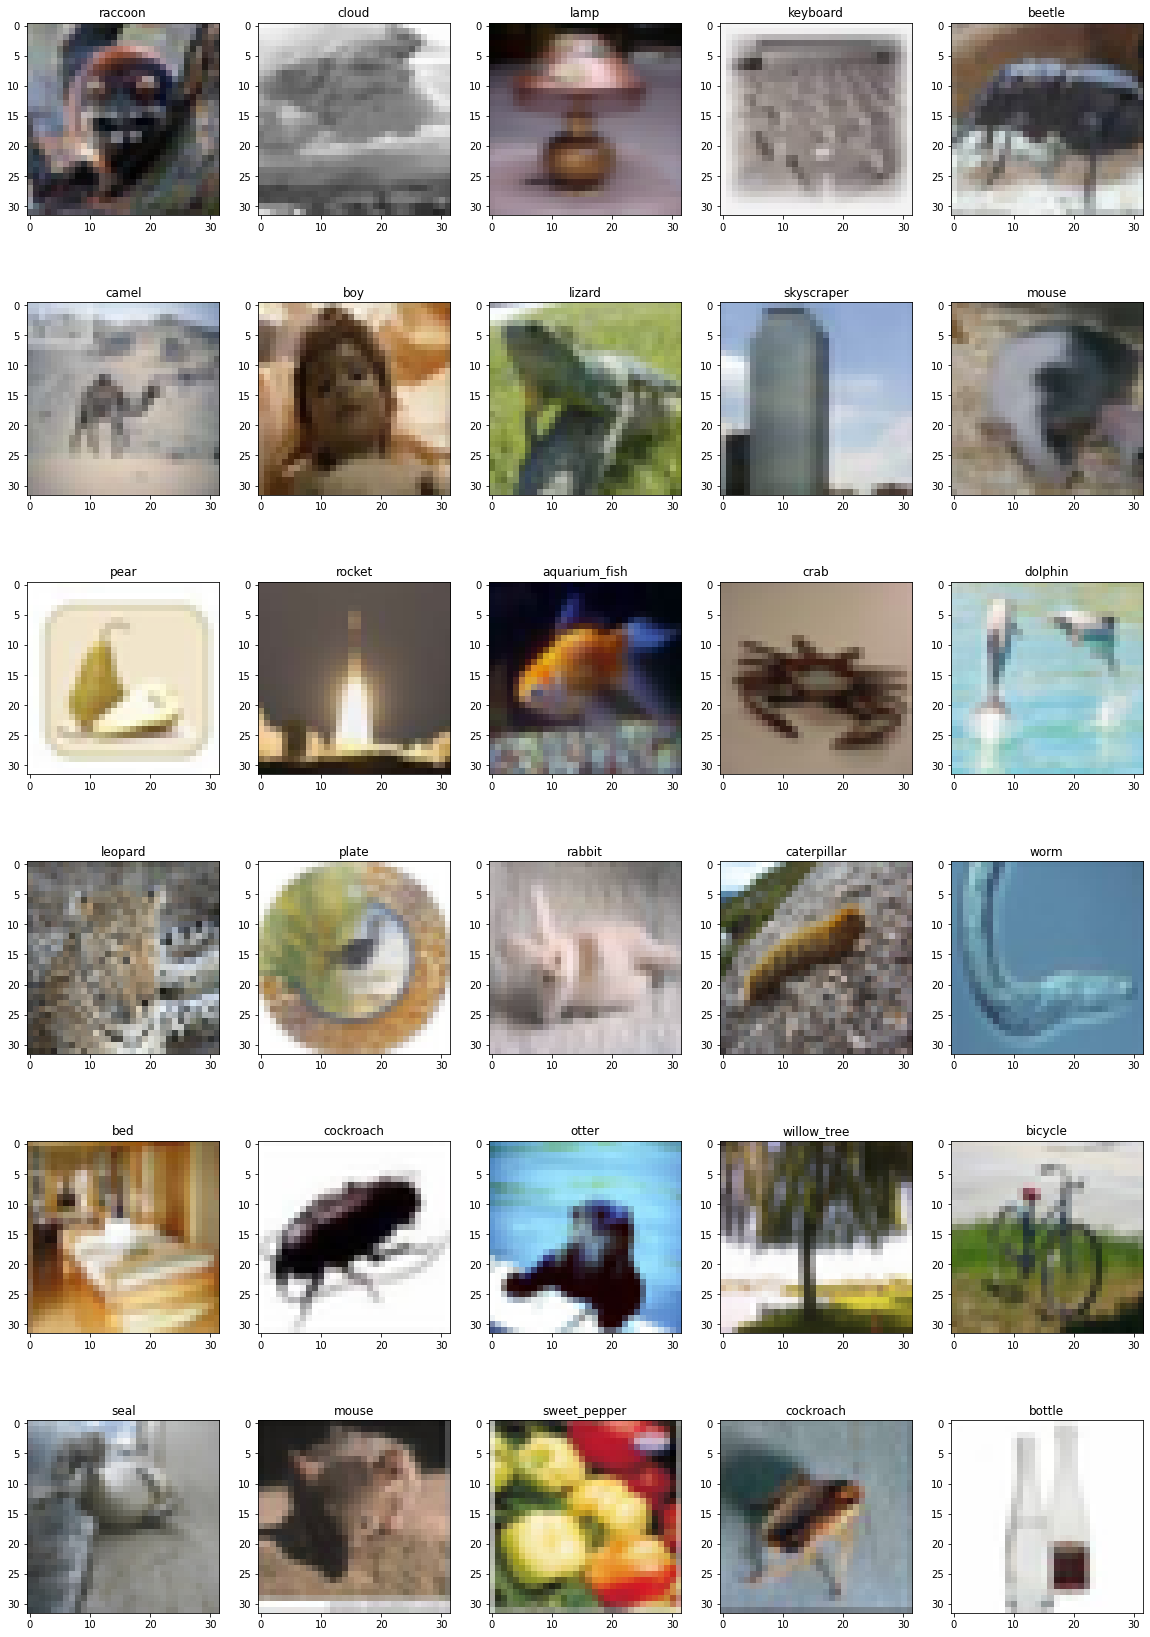

In [47]:
# plot train pics

import math
N_SAMPLES = 30

# initiate plot
n_rows = math.ceil(N_SAMPLES / 5)
n_cols = 5
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
cifar_train_np = cifar_train.as_numpy_iterator()


# plot train
for plot in range(N_SAMPLES):
  image, label = next(cifar_train_np) # generate random sample

  # plot theta
  ax[plot // 5, plot % 5].imshow(image)
  ax[plot // 5, plot % 5].set_title(get_label_name(label))

plt.show()

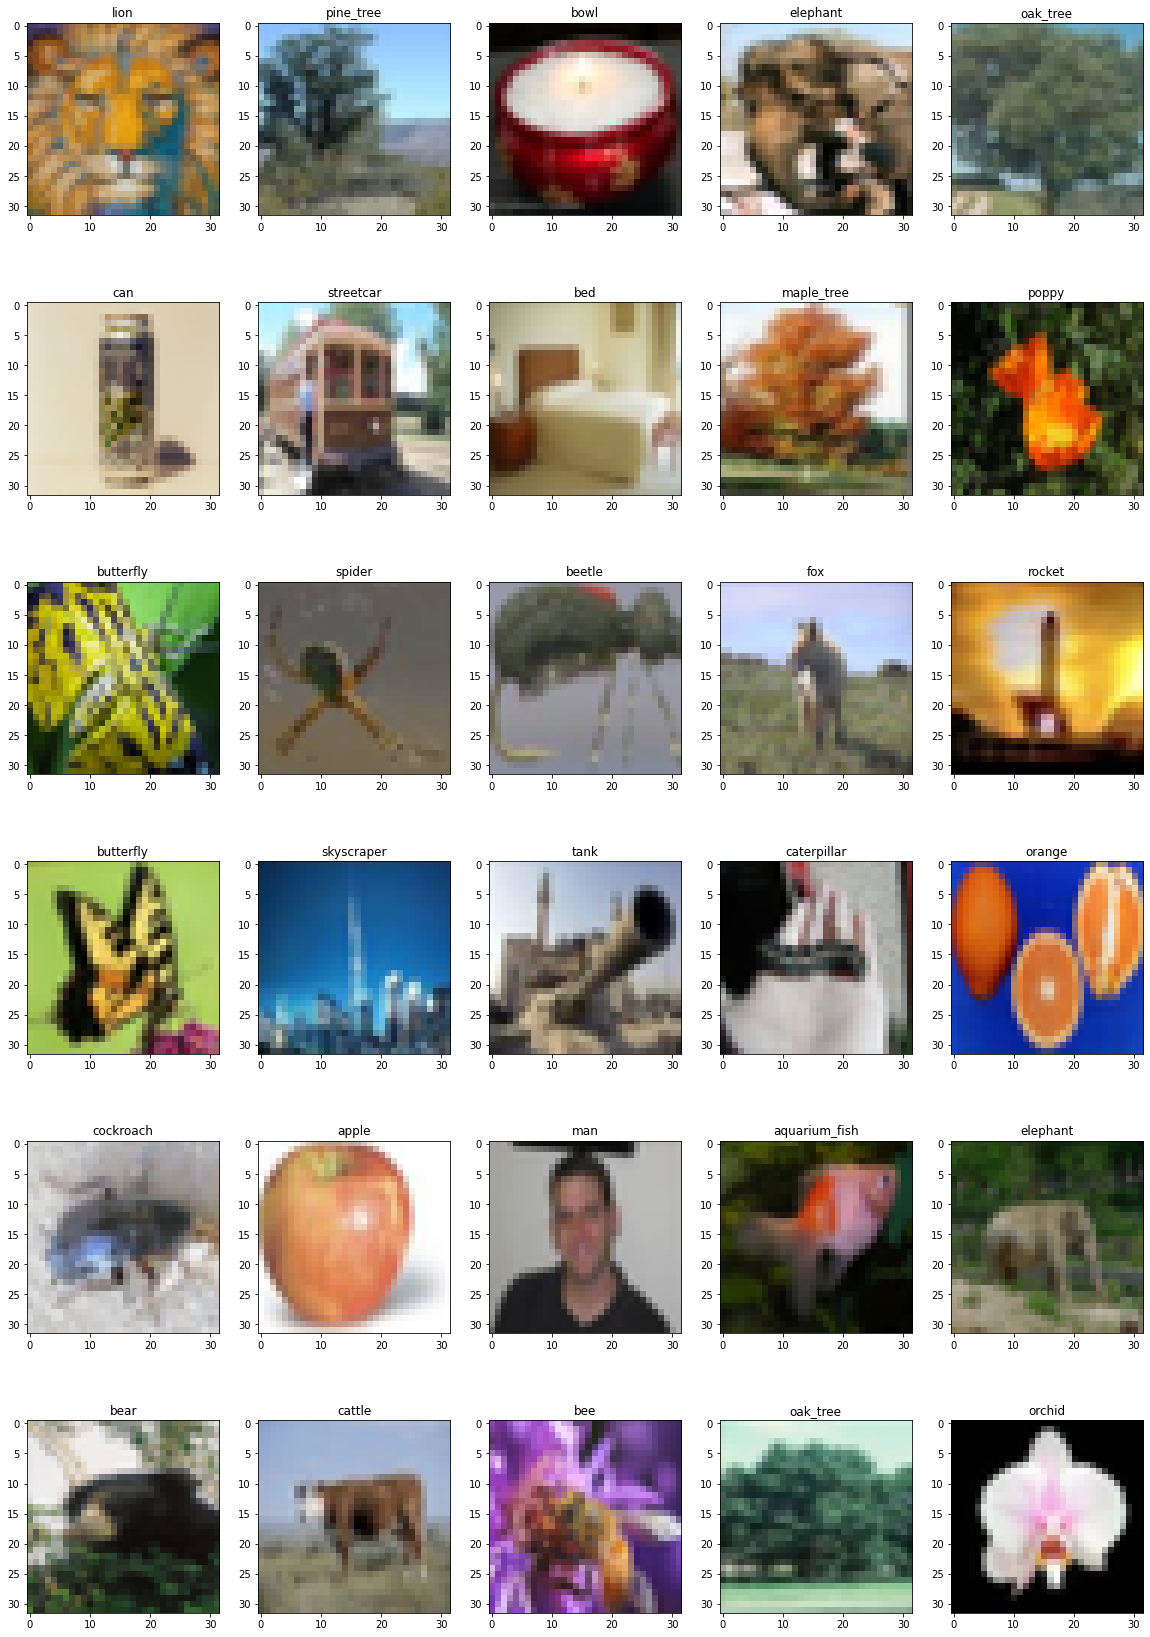

In [48]:
# plot test pics
N_SAMPLES = 30

# initiate plot
n_rows = math.ceil(N_SAMPLES / 5)
n_cols = 5
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
cifar_test_np = cifar_test.as_numpy_iterator()


# plot train
for plot in range(N_SAMPLES):
  image, label = next(cifar_test_np) # generate random sample

  # plot theta
  ax[plot // 5, plot % 5].imshow(image)
  ax[plot // 5, plot % 5].set_title(get_label_name(label))

plt.show()